In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report

# Loading Data

In [26]:
df=pd.read_csv("IMDB Dataset.csv")
df=df.sample(n=5000).reset_index(drop=True)

In [27]:
df.head()

,review,sentiment
0,"Still a sucker for Pyun's esthetic sense, I li...",negative
1,I just called my brother Paulie on the phone a...,positive
2,I'm actually too drained to write this review ...,negative
3,"I enjoy movies like this for their spirit, no ...",positive
4,"Oftentimes, films of this nature come across a...",positive


# TEXT CLEANING

1.LOWER CASING
2. KEEP LETERS ONLY
3. REMOVE STOPPERS, AND KEEP ONLY NOUNS 

In [28]:
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

stemmer = PorterStemmer()
stopwords= set(stopwords.words('english'))

def clean_review_with_stopwords_and_stemming(review):
    review=html.unescape(review) #The html.unescape() function converts HTML character entities back to normal characters.
    reviw=re.sub(r'<.*?>', '', review) # this removes the html tags
    review= review.lower() #text to lower case

    review = re.sub(r'[^a-z\s]','',review) #removes all numeric values except letter from [a-z]

    words= review.split()

    cleaned_review = [stemmer.stem(word) for word in words if word not in stopwords]

    return ' '.join(cleaned_review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df['review']= df['review'].apply(clean_review_with_stopwords_and_stemming)

In [30]:
df.head()

,review,sentiment
0,still sucker pyun esthet sens like movi though...,negative
1,call brother pauli phone said watch hood funni...,positive
2,im actual drain write review bad movi alway fe...,negative
3,enjoy movi like spirit pun intend decent clean...,positive
4,oftentim film natur come across mix bag great ...,positive


# Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.sentiment = encoder.fit_transform(df.sentiment)
df.head()

,review,sentiment
0,still sucker pyun esthet sens like movi though...,0
1,call brother pauli phone said watch hood funni...,1
2,im actual drain write review bad movi alway fe...,0
3,enjoy movi like spirit pun intend decent clean...,1
4,oftentim film natur come across mix bag great ...,1


##### positive = 1, negative = 0

In [32]:
X=df.review
y=df.sentiment
RANDOM_STATE=42
text_train, text_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=RANDOM_STATE)

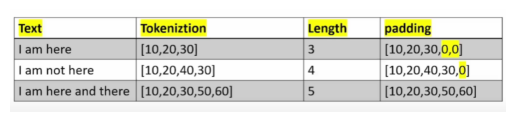

In [33]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('im.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

# Tokenization

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size= len(tokenizer.word_index) + 1
maxlen = max(len(x) for x in X_train)

vocab_size,maxlen

(32258, 820)

In [11]:
#1440 is the highest number of token present in a sequence
#120060 is the number of tokens present

### Adding paddings now

In [35]:
X_train =pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test =pad_sequences(X_test, padding='post', maxlen=maxlen)
#post means putting zeroes at end & pre to add zeroes at front
X_train

array([[  150,     3,  5464, ...,     0,     0,     0],
       [    4, 16061,     3, ...,     0,     0,     0],
       [  151,     6,     2, ...,     0,     0,     0],
       ...,
       [ 1983,    38,   458, ...,     0,     0,     0],
       [  126,  1114,   993, ...,     0,     0,     0],
       [   55,   534,    39, ...,     0,     0,     0]])

# CNN ARCHITECTURE

In [36]:
 embedding_dim = 100 #word[100]

In [37]:
model= Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))  # if binary classification , use sigmoid, otherwise use softmax

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
history = model.fit(X_train,y_train, epochs=3,batch_size=64,verbose=True, validation_data=(X_test,y_test))

Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.5730 - loss: 0.6859 - val_accuracy: 0.6340 - val_loss: 0.6246
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.7810 - loss: 0.5270 - val_accuracy: 0.8200 - val_loss: 0.4206
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.8982 - loss: 0.2688 - val_accuracy: 0.8210 - val_loss: 0.4032


In [39]:
history.history

{'accuracy': [0.6127499938011169, 0.8034999966621399, 0.9122499823570251],
 'loss': [0.6711970567703247, 0.4751690626144409, 0.24181726574897766],
 'val_accuracy': [0.6340000033378601, 0.8199999928474426, 0.8209999799728394],
 'val_loss': [0.6245872378349304, 0.42059847712516785, 0.4032391309738159]}

#### Visulalizing accuracy using matplotlib

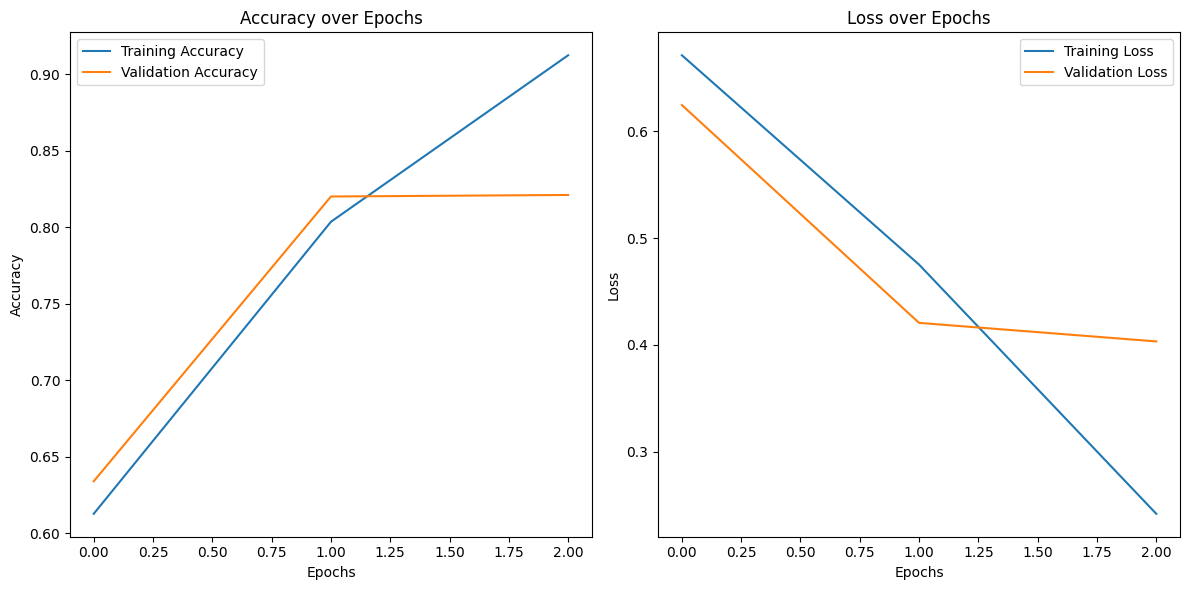

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion and Classification Report

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       510
           1       0.86      0.76      0.81       490

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



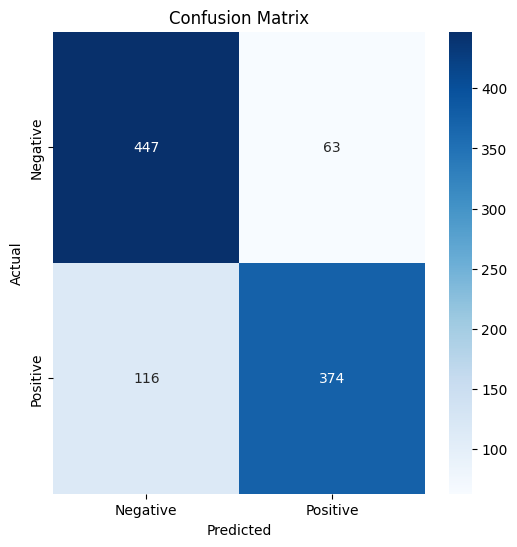

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predict script

In [49]:
def predict_sentiment(review,tokenizer,model,maxlen):
    text=clean_review_with_stopwords_and_stemming(review)

    sequence = tokenizer.texts_to_sequences([text])
    padded_seqence = pad_sequences(sequence, padding='post', maxlen=maxlen)

    prediction = model.predict(padded_seqence)[0][0]
    if prediction>0.5:
        return "Positive"
    else:
        return "Negative"
    

In [51]:
predict_sentiment("Good Movie", tokenizer,model,maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Positive'

In [63]:
model.save("CNN_sentiment.h5")

import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming you have your `tokenizer` object from training
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [64]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [65]:
model.save("CNN_sentiment.h5")